# Aligning with `minimap2`

## Fast basecall

- alignment for no amplicons
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/20250417_1447_MC-114328_AXB238_56275db9/fastq_pass"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/alignments"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq.gz; do
    BASENAME=$(basename "$READ_FILE" .fastq.gz)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

- alignment for short amplicons
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_short_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/20250417_1447_MC-114328_AXB238_56275db9/fastq_pass"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/alignments_short"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq.gz; do
    BASENAME=$(basename "$READ_FILE" .fastq.gz)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

- alignment for long amplicons
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_long_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/20250417_1447_MC-114328_AXB238_56275db9/fastq_pass"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/alignments_long"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq.gz; do
    BASENAME=$(basename "$READ_FILE" .fastq.gz)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

## Dorado basecall

- alignment for no amplicons 
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/basecall/20250430/fastq"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq; do
    BASENAME=$(basename "$READ_FILE" .fastq)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

- alignment for short amplicons 
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_short_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/basecall/20250430/fastq"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments_short"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq; do
    BASENAME=$(basename "$READ_FILE" .fastq)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

- alignment for long amplicons 
```python
%%bash
minimap2="/v/scratch/tools/minimap2/minimap2"

REF="references/reference_long_oligos.fasta" 
READS_DIR="/v/volumes/nanopore/timin_uracil/oligos/timin20250417/basecall/20250430/fastq"
OUT_DIR="/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments_long"

mkdir -p "$OUT_DIR"

for READ_FILE in "$READS_DIR"/*.fastq; do
    BASENAME=$(basename "$READ_FILE" .fastq)
    $minimap2 -x sr --sam-hit-only -a "$REF" "$READ_FILE" > "$OUT_DIR/${BASENAME}.sam"
done
```

---
# Exlopre aligned files

In [2]:
from utils import *
from speedup import *
max_num_of_files = None

def check_sam_data(sam_data):
    result = np.array([
        [read['contig_name'], read['map_quality']] for read in sam_data 
    ])
    plt.figure(figsize=(6,4))
    plt.hist(result[:,0], bins=499, label=f'{len(np.unique(result[:,0]))}/500 reads')
    #plt.title('PCR dataset')
    plt.xlabel('Sequence number')
    plt.ylabel('Count')
    plt.legend(loc='center right')
    plt.show()
    x=np.histogram(result[:,0], bins=499)
    print(f"highest peak at position={int(x[1][np.argmax(x[0])])}")
    
    plt.figure(figsize=(6,4))
    plt.hist(result[:,1], bins=max(result[:,1])-min(result[:,1]))
    #plt.title('dataset')
    plt.xlabel('MapQuality')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.show()

--- Warning! This version of speedup.py can cause errors. ---


## Dorado basecall

In [5]:
dorado_alignments_path = "/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments/*"
dorado_alignments_files = sorted(glob(dorado_alignments_path))[2]

dorado_sam_data = read_sam(dorado_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          max_deletion=10,
                          max_insertion=10,
                          max_indel_frequency=0.4,
                          #wrong_flags={}
                          )

Loading files: 100%|██████████| 1/1 [00:46<00:00, 46.71s/file]

Number of reads stored: 867350
Number of reads dropped: 28236


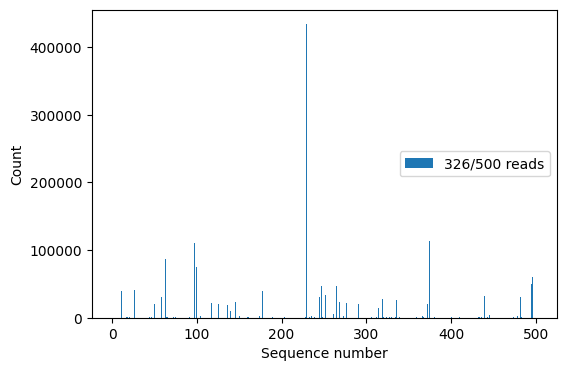

highest peak at position=229


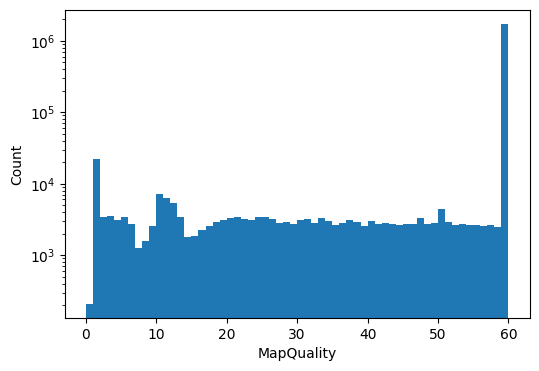

In [3]:
check_sam_data(dorado_sam_data)

In [5]:
dorado_short_alignments_path = "/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments_short/*.sam"
dorado_short_alignments_files = sorted(glob(dorado_short_alignments_path))

dorado_short_sam_data = read_sam(dorado_short_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          max_deletion=10,
                          max_insertion=10,
                          max_indel_frequency=0.4,
                          #wrong_flags={}
                          )

Loading files: 100%|██████████| 5/5 [02:11<00:00, 26.38s/file]


Number of reads stored: 2294575
Number of reads dropped: 697799


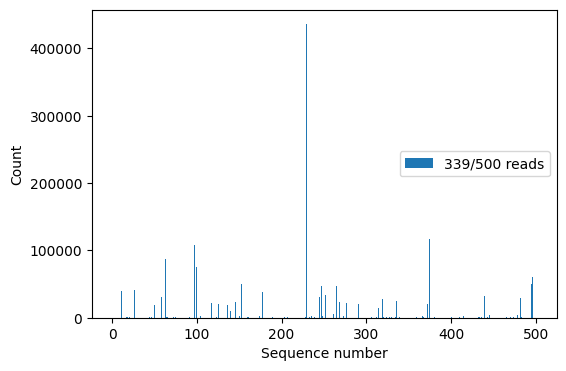

highest peak at position=229


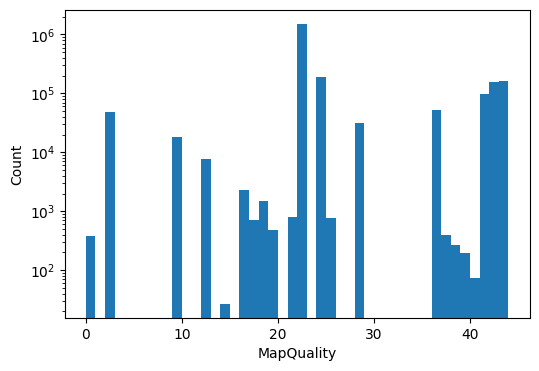

In [6]:
check_sam_data(dorado_short_sam_data)

In [7]:
dorado_long_alignments_path = "/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/dorado_alignments_long/*.sam"
dorado_long_alignments_files = sorted(glob(dorado_long_alignments_path))

dorado_long_sam_data = read_sam(dorado_long_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          max_deletion=10,
                          max_insertion=10,
                          max_indel_frequency=0.4,
                          #wrong_flags={}
                          )

Loading files: 100%|██████████| 5/5 [03:17<00:00, 39.44s/file]


Number of reads stored: 3156014
Number of reads dropped: 2780420


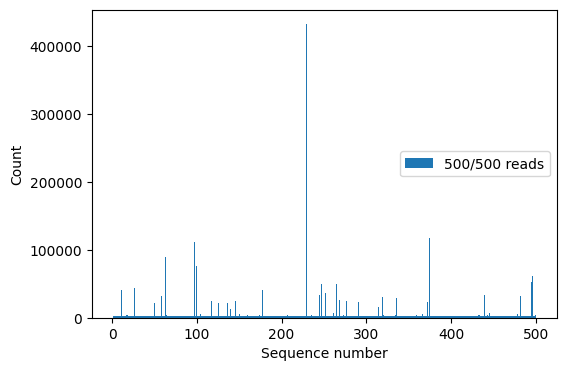

highest peak at position=229


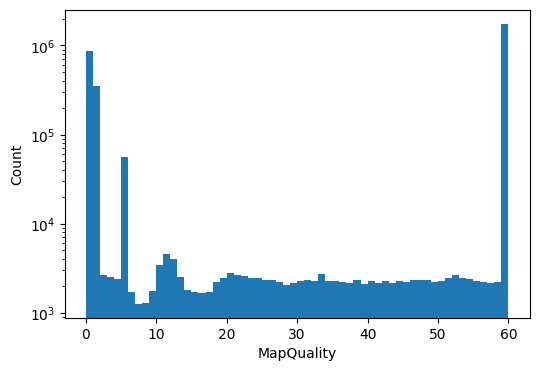

In [8]:
check_sam_data(dorado_long_sam_data)

In [9]:
dorado_long_sam_data_mapq = read_sam(dorado_long_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          max_deletion=10,
                          max_insertion=10,
                          max_indel_frequency=0.4,
                          min_MAPQ=30
                          )

Loading files: 100%|██████████| 5/5 [02:56<00:00, 35.27s/file]

Number of reads stored: 1822479
Number of reads dropped: 4113955


In [ ]:
check_sam_data(dorado_long_sam_data_mapq)

---
## Fast basecall

In [ ]:
short_alignments_path = "/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/alignments_short/*"
short_alignments_files = sorted(glob(short_alignments_path))[:max_num_of_files]
long_alignments_path = "/v/projects/nanopore/balazs/data/new_dataset/thymine_250417/minimap2/alignments_long/*"
long_alignments_files = sorted(glob(long_alignments_path))[:max_num_of_files]

In [ ]:
short_sam_data = read_sam(short_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          #min_MAPQ=30
                         )

In [ ]:
long_sam_data = read_sam(long_alignments_files,
                         verbose=True,
                         has_movetable=False,
                         #min_MAPQ=30
                        )

In [ ]:
short_sam_read_ids = get_feature_from_sam_data(short_sam_data, 'read_id')
long_sam_read_ids = get_feature_from_sam_data(long_sam_data, 'read_id')

#### Read sorting to `short` and `long` datasets

In [ ]:
set_short_sam_read_ids = set(short_sam_read_ids)
set_long_sam_read_ids = set(long_sam_read_ids)

reads_only_in_short_version = set_short_sam_read_ids - set_long_sam_read_ids
print("Reads in only PCR dataset:", len(reads_only_in_short_version))
reads_only_in_long_version = set_long_sam_read_ids - set_short_sam_read_ids
print("Reads in only Bacteria dataset:", len(reads_only_in_long_version))
reads_in_both_sets = set_short_sam_read_ids.intersection(set_long_sam_read_ids)
print("Reads in both datasets:", len(reads_in_both_sets))

In [ ]:
reads_only_in_short_version

In [ ]:
short_result = np.array([
    [read['contig_name'], read['map_quality']] for read in short_sam_data if read['read_id'] in reads_only_in_short_version
])

plt.hist(short_result[:,0], bins=500, label=f'{np.unique(short_result[:,0]).shape[0]}/500 reads')
plt.title('PCR dataset')
plt.xlabel('Sequence number')
plt.ylabel('Count')
plt.legend(loc='center right')
plt.savefig('figures/pcr_histogram_minMQ=0.pdf')
plt.show()

In [ ]:
long_result = np.array([
    [read['contig_name'], read['map_quality']] for read in long_sam_data if read['read_id'] in reads_only_in_long_version
])

x= plt.hist(long_result[:,0], bins=500, label=f'{np.unique(long_result[:,0]).shape[0]}/500 reads',  )

plt.title('Bacteria generated dataset')
plt.xlabel('Sequence number')
plt.ylabel('Count')
plt.legend(loc='center right')
plt.savefig('figures/bacteria_histogram_minMQ=0.pdf')
plt.show()

In [ ]:
x=np.histogram(long_result[:,0], bins=500)
plt.scatter( x[1][:-1], x[0])
len(x[0])

---
# Filtered reads by MapQual

In [ ]:
short_sam_data_filt = read_sam(short_alignments_files,
                          verbose=True,
                          has_movetable=False,
                          min_MAPQ=10
                         )

In [ ]:
long_sam_data_filt = read_sam(long_alignments_files,
                         verbose=True,
                         has_movetable=False,
                         min_MAPQ=10
                        )

In [ ]:
short_sam_read_ids_filt = get_feature_from_sam_data(short_sam_data_filt, 'read_id')
long_sam_read_ids_filt = get_feature_from_sam_data(long_sam_data_filt, 'read_id')

In [ ]:
set_short_sam_read_ids_filt = set(short_sam_read_ids_filt)
set_long_sam_read_ids_filt = set(long_sam_read_ids_filt)

reads_only_in_short_version_filt = set_short_sam_read_ids_filt - set_long_sam_read_ids_filt
print("Reads in only PCR dataset:", len(reads_only_in_short_version_filt))
reads_only_in_long_version_filt = set_long_sam_read_ids_filt - set_short_sam_read_ids_filt
print("Reads in only Bacteria dataset:", len(reads_only_in_long_version_filt))
reads_in_both_sets_filt = set_short_sam_read_ids_filt.intersection(set_long_sam_read_ids_filt)
print("Reads in both datasets:", len(reads_in_both_sets_filt))

In [ ]:
short_result_filt = np.array([
    [read['contig_name'], read['map_quality']] for read in short_sam_data_filt if read['read_id'] in reads_only_in_short_version_filt
])

plt.hist(short_result_filt[:,0], bins=500, label=f'{np.unique(short_result_filt[:,0]).shape[0]}/500 reads')
plt.title('PCR dataset')
plt.xlabel('Sequence number')
plt.ylabel('Count')
plt.legend(loc='center right')
plt.savefig('figures/pcr_histogram_minMQ=10.pdf')
plt.show()

In [ ]:
long_result_filt = np.array([
    [read['contig_name'], read['map_quality']] for read in long_sam_data_filt if read['read_id'] in reads_only_in_long_version_filt
])

plt.hist(long_result_filt[:,0], bins=500, label=f'{np.unique(long_result_filt[:,0]).shape[0]}/500 reads' )
plt.title('Bacteria generated dataset')
plt.xlabel('Sequence number')
plt.ylabel('Count')
plt.legend(loc='center right')
plt.savefig('figures/bacteria_histogram_minMQ=10.pdf')
plt.show()

----
# Phred scale / MapQual: (see [here](https://samtools.github.io/hts-specs/SAMv1.pdf) on p3.) 
Given a probability $0 < p ≤ 1$, the phred scale of
$$Phred =  \left\lfloor −10 \cdot \log_{10} (p) \right\rceil $$

**Phred quality scores are logarithmically linked to error probabilities**

| Phred Quality Score | Probability of incorrect base call | Base call accuracy |
|---------------------|------------------------------------|--------------------|
| 10                  | 1 in 10                            | 90%                |
| 20                  | 1 in 100                           | 99%                |
| 30                  | 1 in 1000                          | 99.9%              |
| 40                  | 1 in 10,000                        | 99.99%             |
| 50                  | 1 in 100,000                       | 99.999%            |
| 60                  | 1 in 1,000,000                     | 99.9999%           |

Source: [Wikipedia/Phred_Score](https://en.wikipedia.org/wiki/Phred_quality_score#Definition)

In [ ]:
p = np.linspace(1e-6, 1, 100000)
phred = np.round(-10*np.log10(p))
plt.plot(p, phred, '--', c='b')
plt.xlabel('probability that the base is incorrectly called')
plt.ylabel('PHRED score')
plt.savefig('figures/phred_score.pdf')
plt.grid()